In [11]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [12]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f:
    style = json.load(f)

In [13]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='steposol_blank_1000x.arw'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_csv(raw_data_filename, sep="\t", header=None)

# Output data
raw_data

,0,1
0,0.000000,0.000000
1,0.000833,0.000000
2,0.001667,0.000000
3,0.002500,0.000000
4,0.003333,0.000000
...,...,...
14396,11.996670,0.007349
14397,11.997500,0.007349
14398,11.998330,0.007348
14399,11.999170,0.007346


In [14]:
# Data preprocessing specific to UHPLC
#TODO: baseline correction?
# TODO: normalize as an option
def preprocess(data: pd.DataFrame, normalize: bool = False, baseline: bool = False):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to UV-Vis.
    """
    # Rename column names 
    data = data.rename(columns={data.columns[0]: "Time (min)", data.columns[1]: "AU"})

    # Baseline correction
    if baseline:
        col: str = "AU"
        data[col] = data[col] - np.average(data[col][0:50])

    # Normalize absorbance values
    if normalize:
        col: str = "AU"
        max_val: float = data[col].max()
        data[col] = data[col] / max_val
    return data

# NOTE: change True to False if you don't want normalization or baseline correction
preprocessed_data: pd.DataFrame = preprocess(raw_data, False, False)
preprocessed_data

,Time (min),AU
0,0.000000,0.000000
1,0.000833,0.000000
2,0.001667,0.000000
3,0.002500,0.000000
4,0.003333,0.000000
...,...,...
14396,11.996670,0.007349
14397,11.997500,0.007349
14398,11.998330,0.007348
14399,11.999170,0.007346


/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_24347/1293927271.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


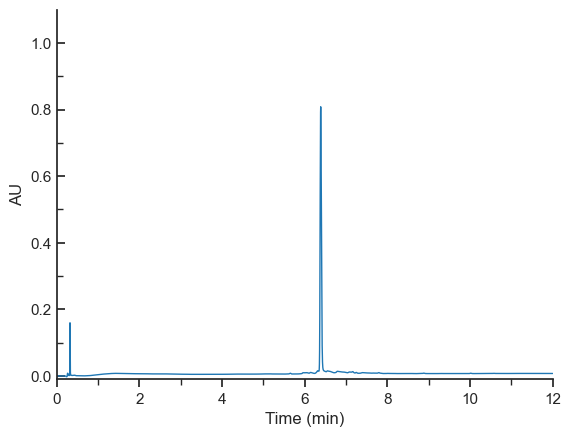

In [15]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook")
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data,
    x="Time (min)",
    y="AU",
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["line_thickness"],
)
sns.despine()

graph.legend(
    fontsize=style["legend"]["font_size"],
    bbox_to_anchor=(0.7, 0.7),
    title_fontsize=18,
    shadow=False,
    frameon=False,
)
# font family
plt.rcParams['font.family'] = style["graph"]["font_family"]

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2))
graph.yaxis.set_minor_locator(AutoMinorLocator(2))
graph.tick_params(axis="y", direction="in")
graph.tick_params(axis="y", which="minor", length=4, direction="in")
graph.tick_params(axis="x", which="minor", length=4, direction="out")

# NOTE: User can change the x and y limits here
plt.xlim(0, 12)
# NOTE: User can change the y limits here
plt.ylim(-0.01, 1.1)

plt.show()